In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder

from sklearn.metrics import accuracy_score,classification_report, confusion_matrix

import warnings
warnings.filterwarnings('ignore')
import pickle

In [2]:
df = pd.read_excel('dataGYM.xlsx')
df.head()

,Age,Height,weight,BMI,Class,Prediction
0,48,4.1,86,40,Extremely obese,Extremely obese--normal exercise+yoga+heavy di...
1,53,4.1,91,42,Extremely obese,Extremely obese--normal exercise+yoga+heavy di...
2,42,4.1,95,44,Extremely obese,Extremely obese--normal exercise+yoga+heavy di...
3,48,4.1,100,46,Extremely obese,Extremely obese--normal exercise+yoga+heavy di...
4,22,4.1,104,48,Extremely obese,Extremely obese--normal exercise+yoga+heavy di...


In [3]:
df['Prediction'].value_counts()

Obese--slow lean+protine+full dite ->Overweight                          281
Under weight--protines+carbs+normal weights ->Healthy                    248
Healthy--fitness+protine+simple dite                                     232
Extremely obese--normal exercise+yoga+heavy dite control+TIPS ->Obese    216
Overweight--lean+cardio+protine+normal dite ->Healthy                    199
Name: Prediction, dtype: int64

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Extremely obese'),
  Text(1, 0, 'Healthy\xa0'),
  Text(2, 0, 'Obese'),
  Text(3, 0, 'Overweight'),
  Text(4, 0, 'Under weight'),
  Text(5, 0, 'EXtremely obese')])

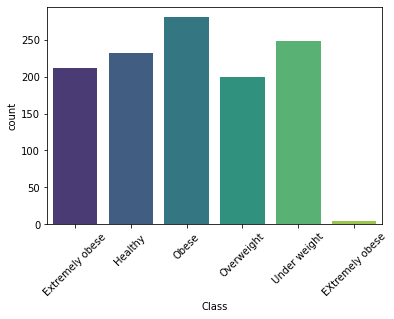

In [4]:
sns.countplot(x= df['Class'], palette='viridis')
plt.xticks(rotation= 45)

In [5]:
df.Class.unique()

array(['Extremely obese', 'Healthy\xa0', 'Obese', 'Overweight',
       'Under weight', 'EXtremely obese'], dtype=object)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1176 entries, 0 to 1175
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Age         1176 non-null   int64  
 1   Height      1176 non-null   float64
 2   weight      1176 non-null   int64  
 3   BMI         1176 non-null   int64  
 4   Class       1176 non-null   object 
 5   Prediction  1176 non-null   object 
dtypes: float64(1), int64(3), object(2)
memory usage: 55.2+ KB


In [7]:
df.Class.value_counts()

Obese              281
Under weight       248
Healthy            232
Extremely obese    212
Overweight         199
EXtremely obese      4
Name: Class, dtype: int64

In [8]:
df['Class'] = df['Class'].replace('EXtremely obese', 'Extremely obese')

In [9]:
#encoding Prediction for feed data into the model
label_encoder = LabelEncoder()
df['Prediction'] = label_encoder.fit_transform(df['Prediction'])

In [10]:
X = df.iloc[:, :4]
y = df.iloc[:, 5:]

In [11]:
X.head()

,Age,Height,weight,BMI
0,48,4.1,86,40
1,53,4.1,91,42
2,42,4.1,95,44
3,48,4.1,100,46
4,22,4.1,104,48


In [12]:
y.value_counts(ascending=True)

Prediction
3             199
0             216
1             232
4             248
2             281
dtype: int64

0 : Extremely Obese
1 : Healthy
2 : Obese
3 : Overweight
4 : Underweight

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
rfc = RandomForestClassifier()

In [15]:
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [16]:
y_pred = rfc.predict(X_test)

In [17]:
result = confusion_matrix(y_test, y_pred)

result1 = classification_report(y_test, y_pred)

result2 = accuracy_score(y_test, y_pred)

print('Confusion Matrix:',result)
print('Classification report:',result1)
print('Accuracy Score : ', result2)

Confusion Matrix: [[43  0  0  0  0]
 [ 0 46  0  0  0]
 [ 0  0 53  2  0]
 [ 0  0  1 40  0]
 [ 0  0  0  0 51]]
Classification report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       1.00      1.00      1.00        46
           2       0.98      0.96      0.97        55
           3       0.95      0.98      0.96        41
           4       1.00      1.00      1.00        51

    accuracy                           0.99       236
   macro avg       0.99      0.99      0.99       236
weighted avg       0.99      0.99      0.99       236

Accuracy Score :  0.9872881355932204


In [18]:

importances = rfc.feature_importances_
#
# Sort the feature importance in descending order
#
sorted_indices = np.argsort(importances)[::-1]

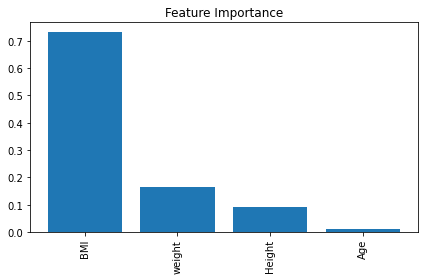

In [19]:
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()

In [20]:
X = X.drop(['BMI'], axis = 1)
X.head()

,Age,Height,weight
0,48,4.1,86
1,53,4.1,91
2,42,4.1,95
3,48,4.1,100
4,22,4.1,104


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
rfc = RandomForestClassifier(n_estimators=20, criterion='entropy')

In [23]:
rfc.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=20)

In [24]:
y_pred = rfc.predict(X_test)

In [25]:
result = confusion_matrix(y_test, y_pred)

result1 = classification_report(y_test, y_pred)

result2 = accuracy_score(y_test, y_pred)

print('Confusion Matrix:',result)
print('Classification report:',result1)
print('Accuracy Score : ', result2)

Confusion Matrix: [[39  0  4  0  0]
 [ 0 41  3  1  1]
 [ 6  1 36 12  0]
 [ 0 11  5 25  0]
 [ 0  6  0  0 45]]
Classification report:               precision    recall  f1-score   support

           0       0.87      0.91      0.89        43
           1       0.69      0.89      0.78        46
           2       0.75      0.65      0.70        55
           3       0.66      0.61      0.63        41
           4       0.98      0.88      0.93        51

    accuracy                           0.79       236
   macro avg       0.79      0.79      0.79       236
weighted avg       0.79      0.79      0.79       236

Accuracy Score :  0.788135593220339


In [26]:
#support vector classifier to improve the accuracy
svc = SVC()

svc.fit(X_train, y_train)

SVC()

In [27]:
y_pred = svc.predict(X_test)

In [28]:
result = confusion_matrix(y_test, y_pred)

result1 = classification_report(y_test, y_pred)

result2 = accuracy_score(y_test, y_pred)

print('Confusion Matrix:',result)
print('Classification report:',result1)
print('Accuracy Score : ', result2)

Confusion Matrix: [[27  1 15  0  0]
 [ 0 25  6  0 15]
 [18 13 24  0  0]
 [ 5 10 22  0  4]
 [ 0  7  0  0 44]]
Classification report:               precision    recall  f1-score   support

           0       0.54      0.63      0.58        43
           1       0.45      0.54      0.49        46
           2       0.36      0.44      0.39        55
           3       0.00      0.00      0.00        41
           4       0.70      0.86      0.77        51

    accuracy                           0.51       236
   macro avg       0.41      0.49      0.45       236
weighted avg       0.42      0.51      0.46       236

Accuracy Score :  0.5084745762711864


In [29]:
#scaling the X for using Standard Scaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

cols = ['Age', 'Height', 'weight']


X_train_std = pd.DataFrame(X_train_std, columns=cols)
X_test_std = pd.DataFrame(X_test_std, columns=cols)

In [30]:
# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 50, 75, 100],   
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'gamma':['scale', 'auto'],
              'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}  
   
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3,n_jobs=-1) 
   
# fitting the model for grid search 
grid.fit(X_train_std, y_train) 
 
# print best parameter after tuning 
print(grid.best_params_) 
grid_predictions = grid.predict(X_test_std) 
   
# print classification report 
print(classification_report(y_test, grid_predictions))

Fitting 5 folds for each of 48 candidates, totalling 240 fits


/Users/adii/opt/anaconda3/envs/gym_app_project/lib/python3.10/site-packages/sklearn/utils/validation.py:1107: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/adii/opt/anaconda3/envs/gym_app_project/lib/python3.10/site-packages/sklearn/utils/validation.py:1107: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/adii/opt/anaconda3/envs/gym_app_project/lib/python3.10/site-packages/sklearn/utils/validation.py:1107: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/adii/opt/anaconda3/envs/gym_app_project/lib/python3.10/site-packages/sklearn/utils/validation.py

/Users/adii/opt/anaconda3/envs/gym_app_project/lib/python3.10/site-packages/sklearn/utils/validation.py:1107: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/adii/opt/anaconda3/envs/gym_app_project/lib/python3.10/site-packages/sklearn/utils/validation.py:1107: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/adii/opt/anaconda3/envs/gym_app_project/lib/python3.10/site-packages/sklearn/utils/validation.py:1107: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/adii/opt/anaconda3/envs/gym_app_project/lib/python3.10/site-packages/sklearn/utils/validation.py

/Users/adii/opt/anaconda3/envs/gym_app_project/lib/python3.10/site-packages/sklearn/utils/validation.py:1107: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/adii/opt/anaconda3/envs/gym_app_project/lib/python3.10/site-packages/sklearn/utils/validation.py:1107: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/adii/opt/anaconda3/envs/gym_app_project/lib/python3.10/site-packages/sklearn/utils/validation.py:1107: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/adii/opt/anaconda3/envs/gym_app_project/lib/python3.10/site-packages/sklearn/utils/validation.py

/Users/adii/opt/anaconda3/envs/gym_app_project/lib/python3.10/site-packages/sklearn/utils/validation.py:1107: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/adii/opt/anaconda3/envs/gym_app_project/lib/python3.10/site-packages/sklearn/utils/validation.py:1107: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/adii/opt/anaconda3/envs/gym_app_project/lib/python3.10/site-packages/sklearn/utils/validation.py:1107: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/adii/opt/anaconda3/envs/gym_app_project/lib/python3.10/site-packages/sklearn/utils/validation.py

/Users/adii/opt/anaconda3/envs/gym_app_project/lib/python3.10/site-packages/sklearn/utils/validation.py:1107: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/adii/opt/anaconda3/envs/gym_app_project/lib/python3.10/site-packages/sklearn/utils/validation.py:1107: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/adii/opt/anaconda3/envs/gym_app_project/lib/python3.10/site-packages/sklearn/utils/validation.py:1107: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/adii/opt/anaconda3/envs/gym_app_project/lib/python3.10/site-packages/sklearn/utils/validation.py

/Users/adii/opt/anaconda3/envs/gym_app_project/lib/python3.10/site-packages/sklearn/utils/validation.py:1107: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/adii/opt/anaconda3/envs/gym_app_project/lib/python3.10/site-packages/sklearn/utils/validation.py:1107: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/adii/opt/anaconda3/envs/gym_app_project/lib/python3.10/site-packages/sklearn/utils/validation.py:1107: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/adii/opt/anaconda3/envs/gym_app_project/lib/python3.10/site-packages/sklearn/utils/validation.py

/Users/adii/opt/anaconda3/envs/gym_app_project/lib/python3.10/site-packages/sklearn/utils/validation.py:1107: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/adii/opt/anaconda3/envs/gym_app_project/lib/python3.10/site-packages/sklearn/utils/validation.py:1107: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/adii/opt/anaconda3/envs/gym_app_project/lib/python3.10/site-packages/sklearn/utils/validation.py:1107: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/adii/opt/anaconda3/envs/gym_app_project/lib/python3.10/site-packages/sklearn/utils/validation.py

{'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}
              precision    recall  f1-score   support

           0       0.85      0.93      0.89        43
           1       0.75      0.83      0.78        46
           2       0.79      0.76      0.78        55
           3       0.76      0.76      0.76        41
           4       0.95      0.82      0.88        51

    accuracy                           0.82       236
   macro avg       0.82      0.82      0.82       236
weighted avg       0.82      0.82      0.82       236



In [31]:
svc = SVC(C=110, gamma= 'auto', kernel='rbf', probability=True)

In [32]:
svc.fit(X_train_std, y_train)

SVC(C=110, gamma='auto', probability=True)

In [33]:
y_pred = svc.predict(X_test_std)

In [34]:
result = confusion_matrix(y_test, y_pred)

result1 = classification_report(y_test, y_pred)

result2 = accuracy_score(y_test, y_pred)

print('Confusion Matrix:',result)
print('Classification report:',result1)
print('Accuracy Score : ', result2)

Confusion Matrix: [[43  0  0  0  0]
 [ 0 38  2  4  2]
 [ 6  1 43  5  0]
 [ 0  5  5 31  0]
 [ 0 10  0  0 41]]
Classification report:               precision    recall  f1-score   support

           0       0.88      1.00      0.93        43
           1       0.70      0.83      0.76        46
           2       0.86      0.78      0.82        55
           3       0.78      0.76      0.77        41
           4       0.95      0.80      0.87        51

    accuracy                           0.83       236
   macro avg       0.83      0.83      0.83       236
weighted avg       0.84      0.83      0.83       236

Accuracy Score :  0.8305084745762712


In [35]:
pickle.dump(svc, open('bmi_health_model.pkl', 'wb'))
model = pickle.load(open('bmi_health_model.pkl', 'rb'))

In [36]:
print(svc.predict([[34, 5.7, 65]]))

[2]
